In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv("data/adult.csv")
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Data Preprocessing

In [ ]:
# data.custody_status.unique()

In [9]:
# data.manner_of_death[(data.manner_of_death != 'Suicide') &
#                      (data.manner_of_death != 'Natural') &
#                     (data.manner_of_death != 'Accidental') &
#                     (data.manner_of_death != 'Homicide') &
#                     (data.manner_of_death != 'Cannot be Determined')] = "Other"

In [11]:
# data.custody_status[(data.custody_status != 'Sentenced') &
#                      (data.custody_status != 'Awaiting Booking') &
#                     (data.custody_status != 'Booked - Awaiting Trial') &
#                     (data.custody_status != 'Booked - No Charges Filed')] = "Other"

In [10]:
# data.race[(data.race != 'White') &
#                      (data.race != 'Hispanic') &
#                     (data.race != 'Black')] = "Other"

In [12]:
data.race.unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [13]:
# data = data[data.age != 'Unk']
data.age = data.age.astype(int)

In [14]:
# data.manner_of_death.unique()

In [15]:
# data.custody_status.unique()

In [16]:
data.age.unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86])

### Categorize age in to age_groups

In [126]:
data['age_group'] = pd.Series(data.age)
data['age_group'][(data.age >= 17) & (data.age < 35)] = "Young Adult"
data['age_group'][(data.age >= 35) & (data.age < 65)] = "Middle Aged"
data['age_group'][data.age >= 65] = "Senior"

In [19]:
data.age_group.unique()

array(['Young Adult', 'Middle Aged', 'Senior'], dtype=object)

### Categorize education in to education_groups

In [48]:
# Education level
data.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [64]:
#  Preschool < 1st-4th < 5th-6th < 7th-8th < 9th < 10th < 11th < 12th < HS-grad 
# < Prof-school < Assoc-acdm < Assoc-voc < Some-college 
# < Bachelors < Masters < Doctorate.

In [125]:
data['education_group'] = pd.Series(data.education)

data['education_group'][
    (data.education == 'Preschool') |
    (data.education == '1st-4th') |
    (data.education == '5th-6th') |
    (data.education == '7th-8th') |
    (data.education == '9th') |
    (data.education == '10th') |
    (data.education == '11th') |
    (data.education == '12th') |
    (data.education == 'HS-grad')
] = "School"

data['education_group'][
    (data.education == 'Prof-school') |
    (data.education == 'Assoc-acdm') |
    (data.education == 'Assoc-voc') |
    (data.education == 'Some-college')
] = "College"

data['education_group'][
    (data.education == 'Bachelors')
] = "Undergraduate"

data['education_group'][
    (data.education == 'Masters')
] = "Masters"

data['education_group'][
    (data.education == 'Doctorate')
] = "Doctorate"

In [66]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'age_group', 'education_group'],
      dtype='object')

### Rename Class Members

In [70]:
# Asian-Pac-Islander -> Asian
# Amer-Indian-Eskimo -> Native American

In [127]:
data['race'][
    (data.race == 'Asian-Pac-Islander')
] = "Asian"

data['race'][
    (data.race == 'Amer-Indian-Eskimo')
] = "Native American"

In [265]:
data['is_white'] = pd.Series(data.race)
data['is_white'][data.race == 'White'] = 'White'
data['is_white'][data.race != 'White'] = 'None_White'

### Give values for different groups to be used in the Income Formula

In [116]:
data['age_group_value'] = pd.Series(data.age)
data['age_group_value'][(data.age >= 17) & (data.age < 35)] = 2
data['age_group_value'][(data.age >= 35) & (data.age < 65)] = 3
data['age_group_value'][data.age >= 65] = 1

In [115]:
data['race_value'] = pd.Series(data.race)
data['race_value'][data.race == 'White'] = 6
data['race_value'][data.race == 'Asian'] = 4
data['race_value'][data.race == 'Other'] = 3
data['race_value'][data.race == 'Native American'] = 2
data['race_value'][data.race == 'Black'] = 1

In [118]:
data['occupation_value'] = pd.Series(data.occupation)

data['occupation_value'][data.occupation == 'Exec-managerial' ] = 20
data['occupation_value'][data.occupation == 'Prof-specialty' ] = 17
data['occupation_value'][data.occupation == 'Sales' ] = 15
data['occupation_value'][data.occupation == 'Machine-op-inspct' ] = 14
data['occupation_value'][data.occupation == 'Farming-fishing' ] = 8
data['occupation_value'][data.occupation == 'Protective-serv' ] = 9
data['occupation_value'][data.occupation == 'Craft-repair' ] = 9
data['occupation_value'][data.occupation == 'Adm-clerical' ] = 10
data['occupation_value'][data.occupation == 'Tech-support' ] = 12
data['occupation_value'][data.occupation == 'Priv-house-serv' ] = 6
data['occupation_value'][data.occupation == 'Transport-moving' ] = 5
data['occupation_value'][data.occupation == 'Handlers-cleaners' ] = 4
data['occupation_value'][data.occupation == 'Armed-Forces' ] = 7
data['occupation_value'][data.occupation == 'Other-service' ] = 3
data['occupation_value'][data.occupation == '?' ] = 3


In [201]:
data['gender_value'] = pd.Series(data.gender)

data['gender_value'][data.gender == 'Male' ] = 1
data['gender_value'][data.gender == 'Female' ] = 0.75

## Derive a formula for Income
- Current 'income' is binary, Not usefull for Thresholding

In [202]:
data['income'] = data['race_value'] * data['age_group_value'] * data['occupation_value'] * data['gender_value'] * 1000

In [203]:
print(f"Min: {data.income.min()} max: {data.income.max()}")

Min: 2250.0 max: 360000


Text(0.5, 1.0, 'Fig 1.1: Histogram - Dependent: Income | Protected: Gender')

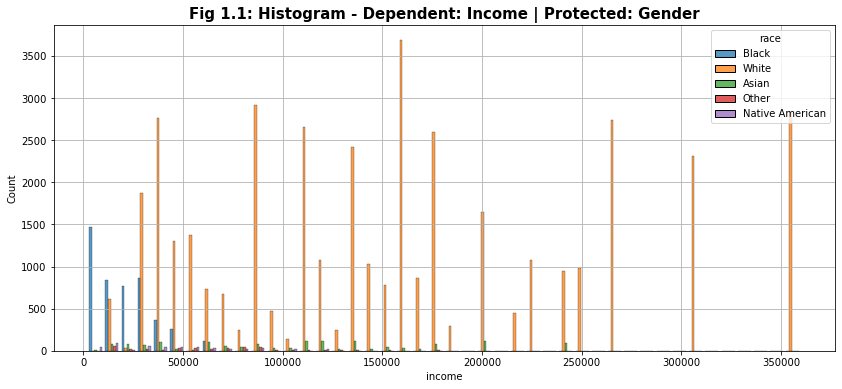

In [245]:
fig, ax = plt.subplots(figsize=(14,6))
g=sns.histplot(data=data, x="income", hue='race', multiple="dodge", shrink=.8, ax =ax)
plt.grid()
plt.title('Fig 1.1: Histogram - Dependent: Income | Protected: Gender', fontdict={'fontsize': 15, 'fontweight': 'heavy'})


Text(0.5, 1.0, 'Fig 1.1: Histogram - Dependent: Income | Protected: Race')

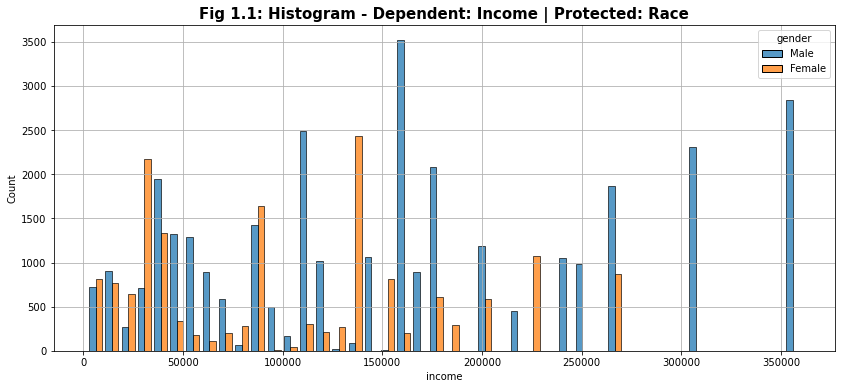

In [246]:
fig, ax = plt.subplots(figsize=(14,6))
g=sns.histplot(data=data, x="income", hue='gender', multiple="dodge", shrink=.8, ax =ax)
plt.grid()
plt.title('Fig 1.1: Histogram - Dependent: Income | Protected: Race', fontdict={'fontsize': 15, 'fontweight': 'heavy'})


In [206]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,native-country,income,age_group,education_group,age_group_value,race_value,occupation_value,default_income_outcome,default_education_outcome,gender_value
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,United-States,28000,Young Adult,School,2,1,14,Unfavorable,Unfavorable,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,United-States,144000,Middle Aged,School,3,6,8,Unfavorable,Favorable,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,United-States,108000,Young Adult,College,2,6,9,Unfavorable,Favorable,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,United-States,42000,Middle Aged,College,3,1,14,Unfavorable,Favorable,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,...,United-States,27000.0,Young Adult,College,2,6,3,Unfavorable,Favorable,0.75


In [74]:
# data.corr()

In [75]:
# data.columns

In [76]:
# data[data.custody_status=='Sentenced']

# STEP 2

##  Step 2.3: Compute the frequency

In [77]:
data.value_counts(["gender"]).sort_index()

gender
Female    16192
Male      32650
dtype: int64

In [78]:
data.value_counts(["age_group"]).sort_index()

age_group  
Middle Aged    25746
Senior          2087
Young Adult    21009
dtype: int64

In [79]:
data.value_counts(["race"]).sort_index()

race           
Asian               1519
Black               4685
Native American      470
Other                406
White              41762
dtype: int64

## Section 2.4: histograms

###   Gender - Income

Text(0.5, 1.0, 'Fig 1.1: Histogram - Dependent: Income | Protected: Gender')

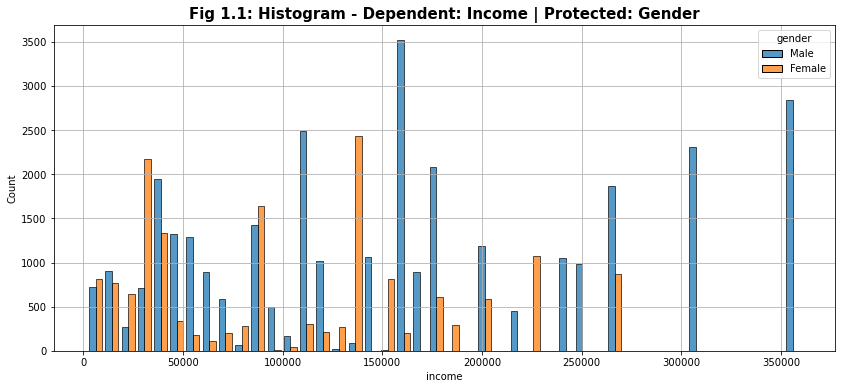

In [247]:
fig, ax = plt.subplots(figsize=(14,6))
g=sns.histplot(data=data, x="income", hue="gender", multiple="dodge", shrink=.8, ax =ax)
plt.grid()
plt.title('Fig 1.1: Histogram - Dependent: Income | Protected: Gender', fontdict={'fontsize': 15, 'fontweight': 'heavy'})


###   Gender - Education level

In [248]:
# data.value_counts('educational-num')

Text(0.5, 1.0, 'Fig 1.2: Histogram - Dependent: Education Level | Protected: Gender')

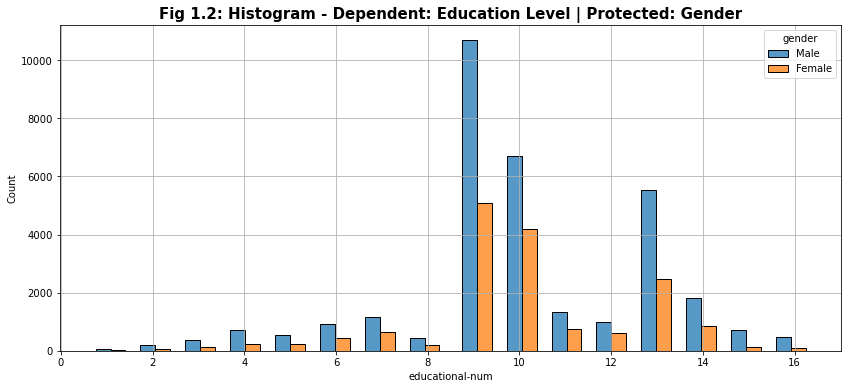

In [253]:
fig, ax = plt.subplots(figsize=(14,6))
g=sns.histplot(data=data, x="educational-num", hue="gender", multiple="dodge", shrink=4, ax =ax)
plt.grid()
plt.title('Fig 1.2: Histogram - Dependent: Education Level | Protected: Gender', fontdict={'fontsize': 15, 'fontweight': 'heavy'})


In [82]:
# data.value_counts(["race", "manner_of_death"]).sort_index()

### Race - Income

Text(0.5, 1.0, 'Fig 1.3: Histogram - Dependent: Income | Protected: Race')

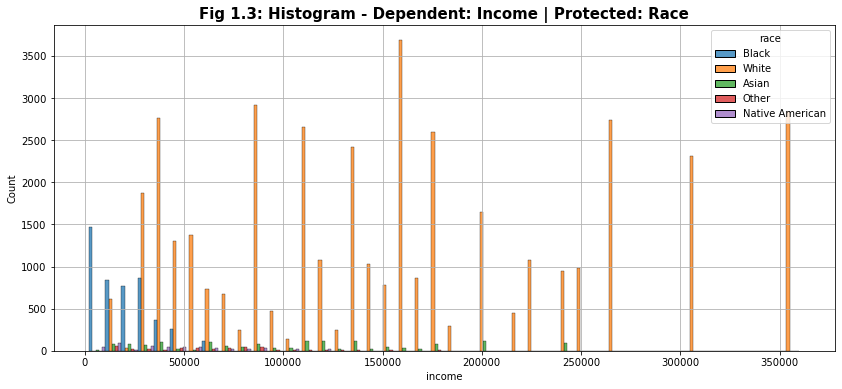

In [256]:
fig, ax = plt.subplots(figsize=(14,6))
g=sns.histplot(data=data, x="income", hue="race", multiple="dodge", shrink=1, ax =ax)
plt.grid()
plt.title('Fig 1.3: Histogram - Dependent: Income | Protected: Race', fontdict={'fontsize': 15, 'fontweight': 'heavy'})


### Race - Education Level

Text(0.5, 1.0, 'Fig 1.4: Histogram - Dependent: Education Level | Protected: Race')

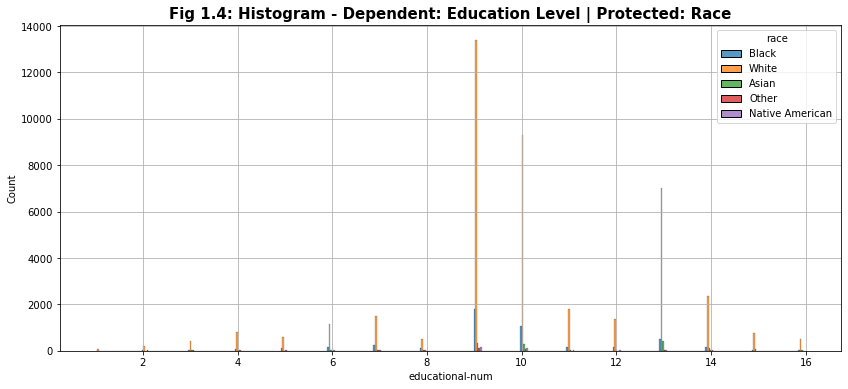

In [260]:
fig, ax = plt.subplots(figsize=(14,6))
g=sns.histplot(data=data, x="educational-num", hue="race", multiple="dodge", shrink=1, ax =ax)
plt.grid()
plt.title('Fig 1.4: Histogram - Dependent: Education Level | Protected: Race', fontdict={'fontsize': 15, 'fontweight': 'heavy'})

### Age - Income

In [257]:
# fig, ax = plt.subplots(figsize=(14,6))
# g=sns.histplot(data=data, x="income", hue="age_group", multiple="dodge", shrink=.8, ax =ax)
# plt.grid()
# plt.title('Fig 1.5: Histogram - Dependent: Income | Protected: Age', fontdict={'fontsize': 15, 'fontweight': 'heavy'})


### Age  - Education Level

In [258]:
# fig, ax = plt.subplots(figsize=(14,6))
# g=sns.histplot(data=data, x="education_group", hue="age_group", multiple="dodge", shrink=.8, ax =ax)
# plt.grid()
# plt.title('Fig 1.6: Histogram - Dependent: Education Level | Protected: Age', fontdict={'fontsize': 15, 'fontweight': 'heavy'})


# STEP 3

In [318]:
THRSHOLD_INCOME = 150000
THRSHOLD_EDUCATION = 13

In [319]:
def SPD(unprivileged_favorable, privileged_favorable, total_unprivileged, total_privileged):
    val = (unprivileged_favorable/total_unprivileged) - (privileged_favorable/total_privileged)
    print(f"SPD={val}")
    
def DI(unprivileged_favorable, privileged_favorable, total_unprivileged, total_privileged):
    val = (unprivileged_favorable/total_unprivileged) / (privileged_favorable/total_privileged)
    print(f"DI={val}")

In [320]:
data['default_income_outcome'] = pd.Series(data.income)
data['default_income_outcome'][data.income >= THRSHOLD_INCOME] = 'Favorable'
data['default_income_outcome'][data.income < THRSHOLD_INCOME] = 'Unfavorable'

data['default_education_outcome'] = pd.Series(data['educational-num'])
data['default_education_outcome'][data['educational-num'] >= THRSHOLD_EDUCATION] = 'Favorable'
data['default_education_outcome'][data['educational-num'] < THRSHOLD_EDUCATION] = 'Unfavorable'

In [460]:
THRSHOLD_EDUCATION = 9

In [322]:
# data.head()

In [323]:
# Sex/Income
vc = data.value_counts(['gender', 'default_income_outcome']).sort_index()
print(vc)

SPD(
    unprivileged_favorable=vc.Female.Favorable,
    privileged_favorable=vc.Male.Favorable,
    total_unprivileged=(vc.Female.Favorable + vc.Female.Unfavorable),
    total_privileged=(vc.Male.Favorable + vc.Male.Unfavorable),
)

DI(
    unprivileged_favorable=vc.Female.Favorable,
    privileged_favorable=vc.Male.Favorable,
    total_unprivileged=(vc.Female.Favorable + vc.Female.Unfavorable),
    total_privileged=(vc.Male.Favorable + vc.Male.Unfavorable),
)

gender  default_income_outcome
Female  Favorable                  4457
        Unfavorable               11735
Male    Favorable                 17184
        Unfavorable               15466
dtype: int64
SPD=-0.251049954148987
DI=0.5229992433097983


In [434]:
# Sex/Education
vc = data.value_counts(['gender', 'default_education_outcome']).sort_index()
print(vc)

SPD(
    unprivileged_favorable=vc.Female.Favorable,
    privileged_favorable=vc.Male.Favorable,
    total_unprivileged=(vc.Female.Favorable + vc.Female.Unfavorable),
    total_privileged=(vc.Male.Favorable + vc.Male.Unfavorable),
)

DI(
    unprivileged_favorable=vc.Female.Favorable,
    privileged_favorable=vc.Male.Favorable,
    total_unprivileged=(vc.Female.Favorable + vc.Female.Unfavorable),
    total_privileged=(vc.Male.Favorable + vc.Male.Unfavorable),
)

gender  default_education_outcome
Female  Favorable                     3567
        Unfavorable                  12625
Male    Favorable                     8543
        Unfavorable                  24107
dtype: int64
SPD=-0.04135993272158295
DI=0.8419288536392738


SPD=-0.04135993272158295
DI=0.8419288536392738


In [417]:
# race/Income
vc = data.value_counts(['is_white', 'default_income_outcome']).sort_index()
print(vc)

SPD(
    unprivileged_favorable=vc.None_White.Favorable,
    privileged_favorable=vc.White.Favorable,
    total_unprivileged=(vc.None_White.Favorable + vc.None_White.Unfavorable),
    total_privileged=(vc.White.Favorable + vc.White.Unfavorable),
)

DI(
    unprivileged_favorable=vc.None_White.Favorable,
    privileged_favorable=vc.White.Favorable,
    total_unprivileged=(vc.None_White.Favorable + vc.None_White.Unfavorable),
    total_privileged=(vc.White.Favorable + vc.White.Unfavorable),
)

is_white    default_income_outcome
None_White  Favorable                   427
            Unfavorable                6653
White       Favorable                 21214
            Unfavorable               20548
dtype: int64
SPD=-0.4476630215828895
DI=0.11872805188344336


SPD=-0.4476630215828895
DI=0.11872805188344336


In [466]:
# race/Education
vc = data.value_counts(['is_white', 'default_education_outcome']).sort_index()
print(vc)

SPD(
    unprivileged_favorable=vc.None_White.Favorable,
    privileged_favorable=vc.White.Favorable,
    total_unprivileged=(vc.None_White.Favorable + vc.None_White.Unfavorable),
    total_privileged=(vc.White.Favorable + vc.White.Unfavorable),
)

DI(
    unprivileged_favorable=vc.None_White.Favorable,
    privileged_favorable=vc.White.Favorable,
    total_unprivileged=(vc.None_White.Favorable + vc.None_White.Unfavorable),
    total_privileged=(vc.White.Favorable + vc.White.Unfavorable),
)

is_white    default_education_outcome
None_White  Favorable                     1454
            Unfavorable                   5626
White       Favorable                    10656
            Unfavorable                  31106
dtype: int64
SPD=-0.0497929618389058
DI=0.8048560742946336


SPD=-0.0497929618389058
DI=0.8048560742946336


## Step 3.3 - Select a pre-processing bias mitigation algorithm

In [271]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

from matplotlib import pyplot as plt

import sys
sys.path.append("../")
import warnings

import numpy as np
from tqdm import tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC as SVM
from sklearn.preprocessing import MinMaxScaler

from aif360.algorithms.preprocessing import DisparateImpactRemover
from aif360.datasets import AdultDataset, StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric

In [370]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'age_group', 'education_group', 'age_group_value',
       'race_value', 'occupation_value', 'default_income_outcome',
       'default_education_outcome', 'gender_value', 'is_white'],
      dtype='object')

In [371]:
data.default_income_outcome.unique()

array(['Unfavorable', 'Favorable'], dtype=object)

In [490]:
def mitigate(protected, privileged_classes, label_name, features_to_keep, repair_level=0.8):
    ad = StandardDataset(
        df=data, 
        protected_attribute_names=[protected],
        privileged_classes=[[privileged_classes]], 
        categorical_features=[],
        label_name=label_name,
        favorable_classes=['Favorable'],
        features_to_keep=features_to_keep
    )
    
    di = DisparateImpactRemover(repair_level)
    transformed_ad = di.fit_transform(ad)
    
    transformed_ad_data = transformed_ad.convert_to_dataframe()[0]

    if label_name == 'default_income_outcome':
        transformed_ad_data['default_income_outcome'][transformed_ad_data.default_income_outcome == 1.0] = 'Favorable'
        transformed_ad_data['default_income_outcome'][transformed_ad_data.default_income_outcome == 0.0] = 'Unfavorable'

    if label_name == 'default_education_outcome':
        transformed_ad_data['default_education_outcome'][transformed_ad_data.default_education_outcome == 1.0] = 'Favorable'
        transformed_ad_data['default_education_outcome'][transformed_ad_data.default_education_outcome == 0.0] = 'Unfavorable'
        
    if protected == 'gender':
        transformed_ad_data['gender'][transformed_ad_data.gender == 1.0] = 'Male'
        transformed_ad_data['gender'][transformed_ad_data.gender == 0.0] = 'Female'
    if protected == 'race':
        transformed_ad_data['is_white'] = pd.Series(transformed_ad_data.race)
        transformed_ad_data['is_white'][transformed_ad_data.race == 1.0] = 'White'
        transformed_ad_data['is_white'][transformed_ad_data.race != 1.0] = 'None_White'
    
    # Run income formula again
    if label_name == 'default_income_outcome':
        transformed_ad_data['income'] = transformed_ad_data['race_value'] * transformed_ad_data['age_group_value'] * transformed_ad_data['occupation_value'] * transformed_ad_data['gender_value'] * 1000

        transformed_ad_data['default_income_outcome'] = pd.Series(transformed_ad_data.income)
        transformed_ad_data['default_income_outcome'][transformed_ad_data.income >= THRSHOLD_INCOME] = 'Favorable'
        transformed_ad_data['default_income_outcome'][transformed_ad_data.income < THRSHOLD_INCOME] = 'Unfavorable'

    if label_name == 'default_education_outcome':        
        transformed_ad_data['default_education_outcome'] = pd.Series(transformed_ad_data['educational-num'])
        transformed_ad_data['default_education_outcome'][transformed_ad_data['educational-num'] >= THRSHOLD_EDUCATION] = 'Favorable'
        transformed_ad_data['default_education_outcome'][transformed_ad_data['educational-num'] < THRSHOLD_EDUCATION] = 'Unfavorable'

    if protected == 'gender':
        # Sex/Income
        if label_name == 'default_income_outcome':
            print("=== Sex/Income Value ===")
            vc = transformed_ad_data.value_counts(['gender', 'default_income_outcome']).sort_index()
            
        # Sex/Education
        if label_name == 'default_education_outcome':
            print("=== Sex/Education Value ===")
            vc = transformed_ad_data.value_counts(['gender', 'default_education_outcome']).sort_index()
        
        print(vc)

        SPD(
            unprivileged_favorable=vc.Female.Favorable,
            privileged_favorable=vc.Male.Favorable,
            total_unprivileged=(vc.Female.Favorable + vc.Female.Unfavorable),
            total_privileged=(vc.Male.Favorable + vc.Male.Unfavorable),
        )

        DI(
            unprivileged_favorable=vc.Female.Favorable,
            privileged_favorable=vc.Male.Favorable,
            total_unprivileged=(vc.Female.Favorable + vc.Female.Unfavorable),
            total_privileged=(vc.Male.Favorable + vc.Male.Unfavorable),
        )

    if protected == 'race':
        # Race/Income
        if label_name == 'default_income_outcome':
            print("==== race/Income Value ====")
            vc = transformed_ad_data.value_counts(['is_white', 'default_income_outcome']).sort_index()
            
        # Race/Education
        if label_name == 'default_education_outcome':
            print("==== race/Education Value ====")
            vc = transformed_ad_data.value_counts(['is_white', 'default_education_outcome']).sort_index()
        
        print(vc)

        SPD(
            unprivileged_favorable=vc.None_White.Favorable,
            privileged_favorable=vc.White.Favorable,
            total_unprivileged=(vc.None_White.Favorable + vc.None_White.Unfavorable),
            total_privileged=(vc.White.Favorable + vc.White.Unfavorable),
        )

        DI(
            unprivileged_favorable=vc.None_White.Favorable,
            privileged_favorable=vc.White.Favorable,
            total_unprivileged=(vc.None_White.Favorable + vc.None_White.Unfavorable),
            total_privileged=(vc.White.Favorable + vc.White.Unfavorable),
        )
        
    return transformed_ad_data
        

In [492]:
gender_income_df = mitigate(
    protected='gender',
    privileged_classes='Male',
    label_name='default_income_outcome',
    features_to_keep=['age_group_value', 'race_value', 'occupation_value', 'gender_value'],
)

=== Sex/Income Value ===
gender  default_income_outcome
Female  Favorable                  4457
        Unfavorable               11735
Male    Favorable                 10684
        Unfavorable               21966
dtype: int64
SPD=-0.05196879028987522
DI=0.8411848555817647


In [493]:
race_income_df = mitigate(
    protected='race',
    privileged_classes='White',
    label_name='default_income_outcome',
    features_to_keep=['age_group_value', 'race_value', 'occupation_value', 'gender_value'],
    repair_level=0.5
)

==== race/Income Value ====
is_white    default_income_outcome
None_White  Favorable                   239
            Unfavorable                6841
White       Favorable                  5152
            Unfavorable               36610
dtype: int64
SPD=-0.08960867704184351
DI=0.27363401191353476


In [494]:
gender_education_df = mitigate(
    protected='gender',
    privileged_classes='Male',
    label_name='default_education_outcome',
    features_to_keep=['age_group_value', 'race_value', 'occupation_value', 'gender_value', 'educational-num'],
    repair_level=0.8
)

=== Sex/Education Value ===
gender  default_education_outcome
Female  Favorable                    14203
        Unfavorable                   1989
Male    Favorable                    28231
        Unfavorable                   4419
dtype: int64
SPD=0.012506124817655229
DI=1.0144637092308613


In [495]:
race_education_df = mitigate(
    protected='race',
    privileged_classes='White',
    label_name='default_education_outcome',
    features_to_keep=['age_group_value', 'race_value', 'occupation_value', 'gender_value', 'educational-num'],
)

==== race/Education Value ====
is_white    default_education_outcome
None_White  Favorable                     5931
            Unfavorable                   1149
White       Favorable                    36503
            Unfavorable                   5259
dtype: int64
SPD=-0.036360258575836135
DI=0.9584013062311572


# Step 4

In [467]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [470]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'age_group', 'education_group', 'age_group_value',
       'race_value', 'occupation_value', 'default_income_outcome',
       'default_education_outcome', 'gender_value', 'is_white'],
      dtype='object')

In [577]:
x = data[['gender', 'age_group_value', 'race_value', 'occupation_value','gender_value']]
y = data[['default_income_outcome']]

x['gender'][x['gender'] == 'Male'] = 1
x['gender'][x['gender'] == 'Female'] = 0

y['default_income_outcome'][y['default_income_outcome'] == 'Favorable'] = 1
y['default_income_outcome'][y['default_income_outcome'] == 'Unfavorable'] = 0

x = x.astype(float)
y = y.astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [583]:
x = gender_income_df[['gender', 'age_group_value', 'race_value', 'occupation_value','gender_value']]
y = gender_income_df[['default_income_outcome']]

x['gender'][x['gender'] == 'Male'] = 1
x['gender'][x['gender'] == 'Female'] = 0

y['default_income_outcome'][y['default_income_outcome'] == 'Favorable'] = 1
y['default_income_outcome'][y['default_income_outcome'] == 'Unfavorable'] = 0

x = x.astype(float)
y = y.astype(int)

x_trans_train, x_trans_test, y_trans_train, y_trans_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [584]:
clf = LogisticRegression(random_state=0).fit(
    x_train[['age_group_value', 'race_value', 'occupation_value','gender_value']],
    y_train
)

clf_transf = LogisticRegression(random_state=0).fit(
    x_trans_train[['age_group_value', 'race_value', 'occupation_value','gender_value']], 
    y_trans_train
)

In [585]:
y_test_preds = clf.predict(x_test[['age_group_value', 'race_value', 'occupation_value','gender_value']])

y_test_transf_preds = clf_transf.predict(x_trans_test[['age_group_value', 'race_value', 'occupation_value','gender_value']])


## 4.5: Sex/Income - Without Transformation - Predictions 

In [589]:
x_test['default_income_outcome'] = y_test_preds

x_test['gender'][x_test['gender'] == 1.0] = 'Male'
x_test['gender'][x_test['gender'] == 0.0] = 'Female'


x_test['default_income_outcome'][x_test['default_income_outcome'] == 1] = 'Favorable'
x_test['default_income_outcome'][x_test['default_income_outcome'] == 0] = 'Unfavorable'


# Sex/Income
vc = x_test.value_counts(['gender', 'default_income_outcome']).sort_index()
print(vc)

SPD(
    unprivileged_favorable=vc.Female.Favorable,
    privileged_favorable=vc.Male.Favorable,
    total_unprivileged=(vc.Female.Favorable + vc.Female.Unfavorable),
    total_privileged=(vc.Male.Favorable + vc.Male.Unfavorable),
)

DI(
    unprivileged_favorable=vc.Female.Favorable,
    privileged_favorable=vc.Male.Favorable,
    total_unprivileged=(vc.Female.Favorable + vc.Female.Unfavorable),
    total_privileged=(vc.Male.Favorable + vc.Male.Unfavorable),
)

gender  default_income_outcome
Female  Favorable                 1344
        Unfavorable               3573
Male    Favorable                 5195
        Unfavorable               4541
dtype: int64
SPD=-0.2602492877242923
DI=0.5122642800223851


# 4.5: Sex/Income - WITH Transformation - Predictions

In [590]:
x_trans_test['default_income_outcome'] = y_test_transf_preds

x_trans_test['gender'][x_trans_test['gender'] == 1.0] = 'Male'
x_trans_test['gender'][x_trans_test['gender'] == 0.0] = 'Female'


x_trans_test['default_income_outcome'][x_trans_test['default_income_outcome'] == 1] = 'Favorable'
x_trans_test['default_income_outcome'][x_trans_test['default_income_outcome'] == 0] = 'Unfavorable'


# Sex/Income
vc = x_trans_test.value_counts(['gender', 'default_income_outcome']).sort_index()
print(vc)

SPD(
    unprivileged_favorable=vc.Female.Favorable,
    privileged_favorable=vc.Male.Favorable,
    total_unprivileged=(vc.Female.Favorable + vc.Female.Unfavorable),
    total_privileged=(vc.Male.Favorable + vc.Male.Unfavorable),
)

DI(
    unprivileged_favorable=vc.Female.Favorable,
    privileged_favorable=vc.Male.Favorable,
    total_unprivileged=(vc.Female.Favorable + vc.Female.Unfavorable),
    total_privileged=(vc.Male.Favorable + vc.Male.Unfavorable),
)

gender  default_income_outcome
Female  Favorable                 1344
        Unfavorable               3573
Male    Favorable                 3250
        Unfavorable               6486
dtype: int64
SPD=-0.06047525321319941
DI=0.818834749143474
